<a href="https://colab.research.google.com/github/cmgospod/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
2 / (4+6)

0.2

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:
import statsmodels.api as sm
import patsy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
RR = pd.read_csv('https://gist.github.com/vincentarelbundock/5409893/raw/a623f2f3bae027a0e51dd01ac5b70d44d909a7b9/RR-processed.csv')
RR.groupby('Country').size()

Country
Australia      64
Austria        62
Belgium        63
Canada         64
Denmark        56
Finland        64
France         54
Germany        59
Greece         40
Ireland        63
Italy          59
Japan          54
Netherlands    53
New Zealand    64
Norway         64
Portugal       58
Spain          42
Sweden         64
UK             64
US             64
dtype: int64

In [0]:
bins = ["0-30%", "30-60%", "60-90%","Above 90%"]
RR['dgcat'] = np.digitize(RR.debtgdp, [0,30,60,90,np.inf]) - 1
RR.dgcat = [bins[x] for x in RR.dgcat]

bins = ["0-30%", "30-60%", "60-90%", "90-120%", "Above 120%"]
RR['dgcat2'] = np.digitize(RR.debtgdp, [0,30,60,90,120,np.inf]) - 1
RR.dgcat2 = [bins[x] for x in RR.dgcat2]

In [0]:
y,X = patsy.dmatrices('dRGDP ~ dgcat', data=RR[['dRGDP', 'dgcat']].dropna())
print(sm.OLS(y,X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  dRGDP   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     18.36
Date:                Mon, 05 Aug 2019   Prob (F-statistic):           1.22e-11
Time:                        21:16:25   Log-Likelihood:                -2927.9
No. Observations:                1175   AIC:                             5864.
Df Residuals:                    1171   BIC:                             5884.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.1735      0

In [0]:
y2,X2 = patsy.dmatrices('dRGDP ~ dgcat2', data=RR[['dRGDP', 'dgcat2']].dropna())
print(sm.OLS(y2,X2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  dRGDP   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     14.24
Date:                Mon, 05 Aug 2019   Prob (F-statistic):           2.36e-11
Time:                        21:18:28   Log-Likelihood:                -2926.9
No. Observations:                1175   AIC:                             5864.
Df Residuals:                    1170   BIC:                             5889.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.1735 

In [0]:
RR.dRGDP.groupby(RR.dgcat).mean()

dgcat
0-30%        4.173523
30-60%       3.092145
60-90%       3.186575
Above 90%    2.167972
Name: dRGDP, dtype: float64

In [0]:
RR.dRGDP.groupby([RR.Country, RR.dgcat]).mean().unstack()

dgcat,0-30%,30-60%,60-90%,Above 90%
Country,,,,
Australia,3.205885,4.947205,4.042175,3.774250
Austria,5.207527,3.256526,-3.824000,NaN
Belgium,NaN,4.191655,3.079868,2.566828
Canada,2.515704,3.525446,4.523574,2.956640
Denmark,3.518584,1.700034,2.391147,NaN
Finland,3.817029,2.418535,5.488887,NaN
France,5.058476,2.616159,3.019631,NaN
Germany,3.873759,0.875803,NaN,NaN
Greece,4.001282,0.340200,2.696000,2.910632


In [0]:
RR.dRGDP.groupby(RR.dgcat2).mean()

dgcat2
0-30%         4.173523
30-60%        3.092145
60-90%        3.186575
90-120%       2.405934
Above 120%    1.561553
Name: dRGDP, dtype: float64

In [0]:
RR.dRGDP.groupby([RR.Country, RR.dgcat2]).mean().unstack()

dgcat2,0-30%,30-60%,60-90%,90-120%,Above 120%
Country,,,,,
Australia,3.205885,4.947205,4.042175,6.920201,2.987763
Austria,5.207527,3.256526,-3.824000,NaN,NaN
Belgium,NaN,4.191655,3.079868,2.702629,-0.692378
Canada,2.515704,3.525446,4.523574,4.544839,0.574341
Denmark,3.518584,1.700034,2.391147,NaN,NaN
Finland,3.817029,2.418535,5.488887,NaN,NaN
France,5.058476,2.616159,3.019631,NaN,NaN
Germany,3.873759,0.875803,NaN,NaN,NaN
Greece,4.001282,0.340200,2.696000,2.910632,NaN


In [0]:
idx = (RR.Country == 'New Zealand') & (RR.Year < 1950) | (RR.Country == 'Australia') & (RR.Year < 1951) | (RR.Country == 'Canada') & (RR.Year < 1951)
RR_selective = RR[idx == False]
RR_selective.dRGDP.groupby(RR_selective.dgcat).mean()

dgcat
0-30%        4.173523
30-60%       3.092145
60-90%       3.186575
Above 90%    1.919934
Name: dRGDP, dtype: float64

In [0]:
RR_selective.mean()

Unnamed: 0    5.916408e+02
Year          1.979633e+03
Debt          1.621458e+07
RGDP          2.369173e+05
GDP           1.957611e+05
dRGDP         3.408270e+00
GDPI          5.034180e+01
GDP1          1.470725e+07
GDP2          1.824865e+07
RGDP1         1.425590e+07
RGDP2         3.072470e+07
GDPI1         5.589542e+02
GDPI2         8.690705e+01
Infl          5.632643e+00
Debt1         5.625405e+05
Debt2         1.050730e+05
Debtalt       1.006665e+07
GDP2alt       4.450790e+05
GDPalt        2.079659e+06
RGDP2alt      1.033331e+05
debtgdp       4.530375e+01
GDP3          7.689113e+04
GNI           5.156239e+08
lRGDP         2.351587e+05
lRGDP1        1.405853e+07
lRGDP2        3.047113e+07
dtype: float64

In [0]:
RR_selective.dRGDP.groupby([RR_selective.Country, RR_selective.dgcat]).mean().unstack()

dgcat,0-30%,30-60%,60-90%,Above 90%
Country,,,,
Australia,3.205885,4.947205,4.042175,NaN
Austria,5.207527,3.256526,-3.824000,NaN
Belgium,NaN,4.191655,3.079868,2.566828
Canada,2.515704,3.525446,4.523574,NaN
Denmark,3.518584,1.700034,2.391147,NaN
Finland,3.817029,2.418535,5.488887,NaN
France,5.058476,2.616159,3.019631,NaN
Germany,3.873759,0.875803,NaN,NaN
Greece,4.001282,0.340200,2.696000,2.910632


In [0]:
drop = ["Australia", "Austria","Belgium","Canada","Denmark"]
idx = [False if x in drop else True for x in RR_selective.Country]
RR_selective_spreadsheet = RR_selective[idx]
RR_selective_spreadsheet.dRGDP.groupby(RR.dgcat).mean()

dgcat
0-30%        4.236391
30-60%       2.958902
60-90%       3.160164
Above 90%    1.692155
Name: dRGDP, dtype: float64

In [0]:
RR_selective_spreadsheet_transcription = RR_selective_spreadsheet.copy()
RR_selective_spreadsheet_transcription.RGDP[RR_selective_spreadsheet_transcription.Country=='New Zealand'] = -7.9
RR_selective_spreadsheet_transcription.dRGDP.groupby(RR.dgcat).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


dgcat
0-30%        4.236391
30-60%       2.958902
60-90%       3.160164
Above 90%    1.692155
Name: dRGDP, dtype: float64

In [0]:
a = RR_selective_spreadsheet_transcription.Country
b = RR_selective_spreadsheet_transcription.dgcat
RR_selective_spreadsheet_transcription.dRGDP.groupby(b).mean()

dgcat
0-30%        4.236391
30-60%       2.958902
60-90%       3.160164
Above 90%    1.692155
Name: dRGDP, dtype: float64

In [0]:
published_means = RR_selective_spreadsheet_transcription.dRGDP.groupby([a,b]).mean().unstack()
published_means.loc['New Zealand', 'Above 90%'] = -7.9
# Changed from original to avoid deprecated .ix
published_means.mean()

dgcat
0-30%        4.089220
30-60%       2.854316
60-90%       3.399440
Above 90%   -0.062062
dtype: float64

In [0]:
RR.dRGDP.groupby(RR.dgcat).median()

dgcat
0-30%        4.145376
30-60%       3.104629
60-90%       2.897829
Above 90%    2.335324
Name: dRGDP, dtype: float64

In [0]:
RR.dRGDP.groupby(RR.dgcat2).median()

dgcat2
0-30%         4.145376
30-60%        3.104629
60-90%        2.897829
90-120%       2.373340
Above 120%    2.039469
Name: dRGDP, dtype: float64

In [0]:
RR.Country.groupby([RR.Country, RR.dgcat]).size().unstack().sum()

dgcat
0-30%        426.0
30-60%       439.0
60-90%       200.0
Above 90%    110.0
dtype: float64

In [0]:
RR_selective.Country.groupby([RR.Country, RR.dgcat]).size().unstack().sum()

dgcat
0-30%        426.0
30-60%       439.0
60-90%       200.0
Above 90%     96.0
dtype: float64

In [0]:
RR_selective_spreadsheet.Country.groupby([RR.Country, RR.dgcat]).size().unstack().sum()

dgcat
0-30%        329.0
30-60%       324.0
60-90%       138.0
Above 90%     71.0
dtype: float64

Figure(432x288)


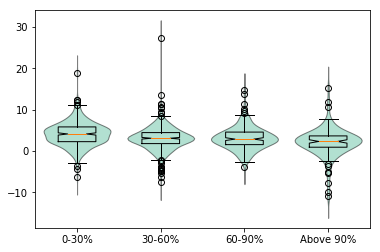

In [0]:
labels = ["0-30%","30-60%","60-90%","Above 90%"]
dat = [np.array(RR.dRGDP[RR.dgcat==x]) for x in labels]
print(sm.graphics.violinplot(dat, labels=labels))

Figure(432x288)


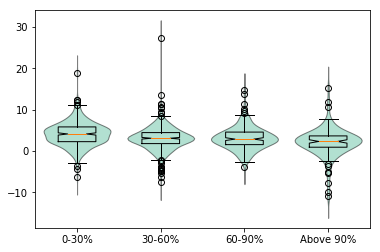

In [0]:
labels = ["0-30%","30-60%","60-90%","Above 90%"]
dat = [np.array(RR.dRGDP[RR.dgcat==x]) for x in labels]
print(sm.graphics.violinplot(dat, labels=labels))

In [0]:
years = range(1950, 2001, 10)
f = lambda x: (x, RR[RR.Year >= x].dRGDP.groupby(RR[RR.Year >= x].dgcat).mean())
[f(x) for x in years]

[(1950, dgcat
  0-30%        4.135295
  30-60%       2.980839
  60-90%       3.100982
  Above 90%    2.121852
  Name: dRGDP, dtype: float64), (1960, dgcat
  0-30%        3.895619
  30-60%       2.909601
  60-90%       2.779663
  Above 90%    2.074064
  Name: dRGDP, dtype: float64), (1970, dgcat
  0-30%        3.145224
  30-60%       2.644951
  60-90%       2.559289
  Above 90%    1.959229
  Name: dRGDP, dtype: float64), (1980, dgcat
  0-30%        2.541408
  30-60%       2.451346
  60-90%       2.435681
  Above 90%    1.959229
  Name: dRGDP, dtype: float64), (1990, dgcat
  0-30%        2.669334
  30-60%       2.403622
  60-90%       2.457587
  Above 90%    1.823201
  Name: dRGDP, dtype: float64), (2000, dgcat
  0-30%        2.747593
  30-60%       1.881735
  60-90%       1.290506
  Above 90%    1.745087
  Name: dRGDP, dtype: float64)]

In [0]:
RR['dRGDP_lag'] = RR.dRGDP.groupby(RR.Country).apply(lambda x: x.shift())
y,X = patsy.dmatrices('dRGDP ~ dgcat + dRGDP_lag', data=RR[['dRGDP', 'dgcat', 'dRGDP_lag']].dropna())
print(sm.OLS(y,X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  dRGDP   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     63.84
Date:                Mon, 05 Aug 2019   Prob (F-statistic):           8.90e-49
Time:                        21:54:16   Log-Likelihood:                -2723.0
No. Observations:                1155   AIC:                             5456.
Df Residuals:                    1150   BIC:                             5481.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.5045      0

In [0]:
y,X = patsy.dmatrices('dRGDP ~ dgcat + dRGDP_lag + Country', data=RR[['dRGDP', 'dgcat', 'dRGDP_lag', 'Country']].dropna())
print(sm.OLS(y,X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  dRGDP   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     11.89
Date:                Mon, 05 Aug 2019   Prob (F-statistic):           1.84e-39
Time:                        21:57:12   Log-Likelihood:                -2713.7
No. Observations:                1155   AIC:                             5475.
Df Residuals:                    1131   BIC:                             5597.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




  The code above is a reanalysis of data regarding the effects of public debt on GDP growth. The primary method of analysis is simply sorting the data points, each of which represents a certain country at a certain year, into a number of buckets based on their ratio of public debt to GDP. The average growth in each bucket is then calculated, and each average compared to establish a correlation between public debt and growth. The reanalysis adds data missing from the original paper and fixes erroneous data. With these alterations, the effect found in the original paper becomes much less dramatic.
  
  The most challenging part of recreating this reanalysis was keeping track of the large number of variables. Until I looked it up just now, I did not know what "RGDP" was and I'm still unsure what "dgcat" is. Without any concrete associations, these are just strings of letters, which makes it much more difficult for me to keep them straight in my head.
  
  The most interesting thing I learned about is the summary() command, which will make it much easier to learn about regression models I have created.
  
  Given more time, I would have to liked to reasearch more about the subject matter so I could have more concrete associations with the various pieces of data

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.